In [320]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [321]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [323]:
# Check for duplicate values
df[df.duplicated()].count()

satisfaction_level       3008
last_evaluation          3008
number_project           3008
average_montly_hours     3008
time_spend_company       3008
Work_accident            3008
left                     3008
promotion_last_5years    3008
sales                    3008
salary                   3008
dtype: int64

# Observations:
- 10 columns and 15000 records in total.
- No Missing Values or wrong datatype
- some of column name are incorrect or incorrectly spelled. there is no column `sales` instead it should be `department`.
- There are duplicate values: 3008

In [324]:
# correct the column names. As per data dictionary, sales is not column name, it should be department. 
df.rename(columns={"average_montly_hours":"average_monthly_hours", "Work_accident":'work_accident', 'sales':'department'}, inplace=True)

In [325]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [326]:
# Remove duplicate records. 
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [327]:
# Check for basic statistics of dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [328]:
# Check for correlation matrix
corr_marix = df.corr(numeric_only=True)
corr_marix

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


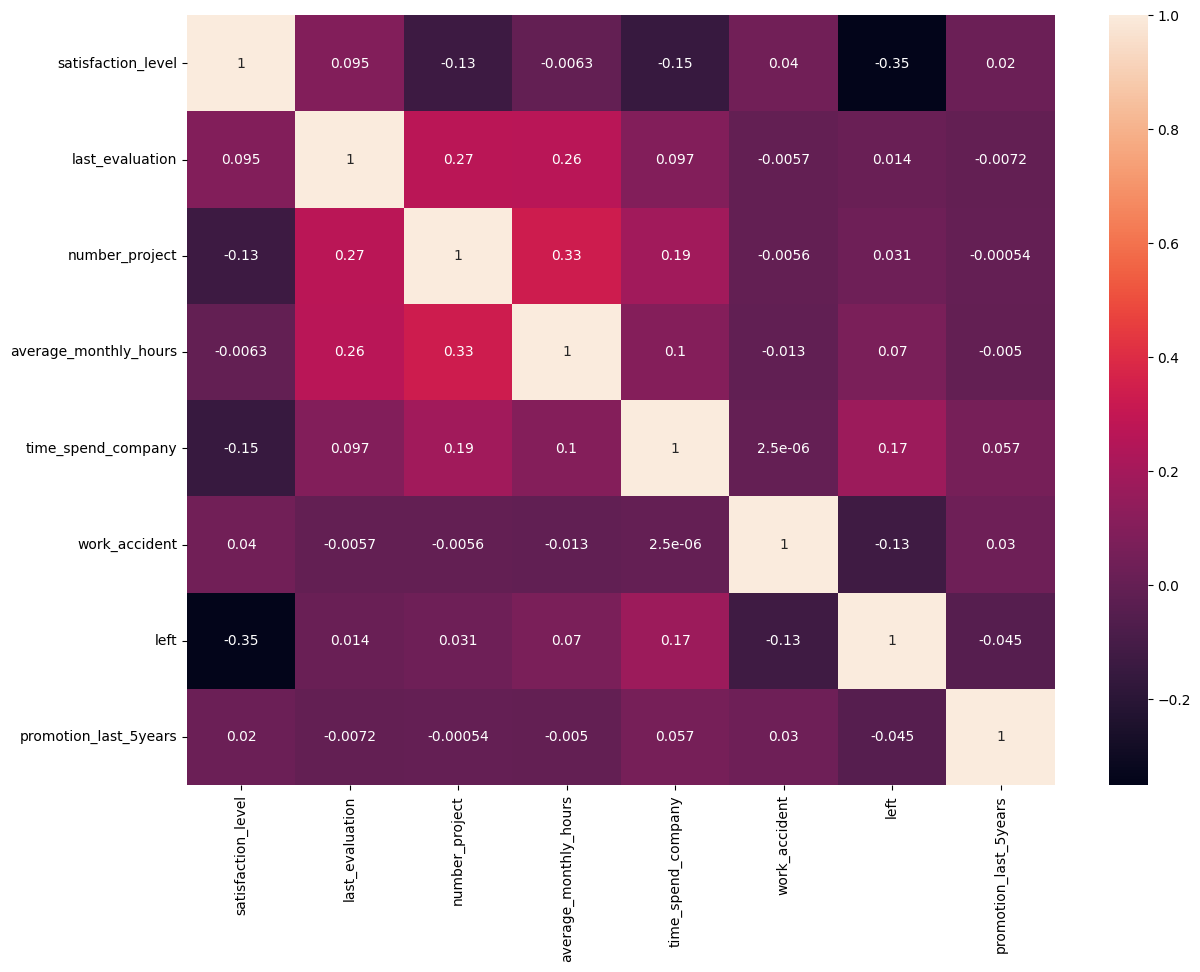

In [329]:
# Plot the correlation matix using heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_marix, annot=True)
plt.show()

### Observations:
- Highest postive correlation is between the `Number of project` and `average monthly hours`, this might be due to fact that if one has more project then he might have to strech little bit in office.
- `Number of project` and `average monthlt hours`, both have the almost equal positive correlation with `last evalution`. person who had worked on more projects and had spent more time in office, might had better `last evalution` rating. 
- `Number of project` is also has postive correlation with `time spend in company`, this might because people who have spend time more time in company might have got opportunity work on more projects.
- `left` column has comparetively high negative correlation with `satisfaction level`, and the mild with `work accident` and `promotion in last years`. More satisfied people tends to stay with company 

In [330]:
df.department.value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

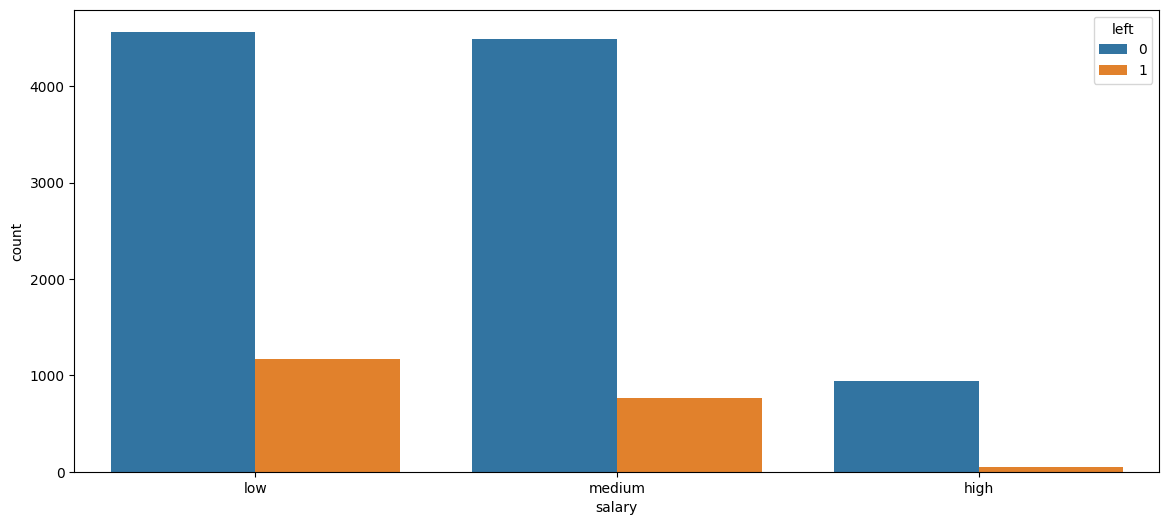

In [331]:
plt.figure(figsize=(14,6))
sns.countplot(df, x='salary', hue='left')
plt.show()

In [332]:
df.groupby(['salary', 'left']).mean(numeric_only=True)

satisfaction_level  last_evaluation  number_project  \
salary left                                                        
high   0               0.653832         0.708068        3.794055   
       1               0.437500         0.682708        3.750000   
low    0               0.669457         0.717727        3.785589   
       1               0.440630         0.721567        3.864566   
medium 0               0.668077         0.715167        3.786509   
       1               0.439896         0.724551        3.920676   

             average_monthly_hours  time_spend_company  work_accident  \
salary left                                                             
high   0                199.919321            3.477707       0.165605   
       1                202.979167            3.812500       0.000000   
low    0                198.668857            3.176084       0.182216   
       1                207.324532            3.878194       0.048552   
medium 0                199.016251            3.304096       0.168522   
       1                209.764629            3.890767       0.062419   

             promotion_last_5years  
salary left                         
high   0                  0.046709  
       1                  0.000000  
low    0                  0.007227  
       1                  0.004259  
medium 0                  0.026269  
       1                  0.003901

In [333]:
# salary wise analysis of peaople left vs stay
df[['left', 'salary']].groupby(['salary']).value_counts(normalize=True)*100

salary  left
high    0       95.151515
        1        4.848485
low     0       79.547038
        1       20.452962
medium  0       85.383007
        1       14.616993
Name: proportion, dtype: float64

### Observations:
1. 20 % peaople with low salary has left the organisation and 14.6% from medium salary range. only 4.8% from high salary range has left.
2. 95% emps with high salary stayed in org, it might be due to they have got better rating in last evaulation and been promted, despite spending less time in office worked on more projects. 
3. Almost 5% employees with high salary was not satisfied despite working for long office hours and more projects they did not recieved promotion in last 5 years and have recieved comparatively less rating in last evaluation.
4. Low salary employee despiting getting the best rating in last evalution has left organisation

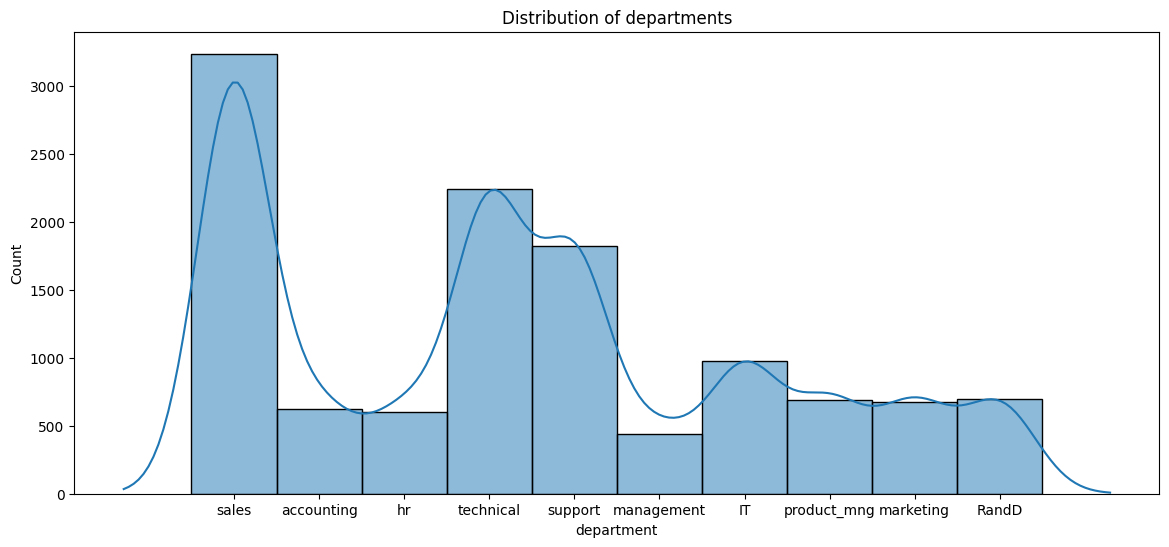

In [334]:
plt.figure(figsize=(14,6))
sns.histplot(df["department"], kde=True, kde_kws=dict(cut=3))
plt.title('Distribution of departments')
plt.show()

<Axes: xlabel='satisfaction_level', ylabel='Density'>

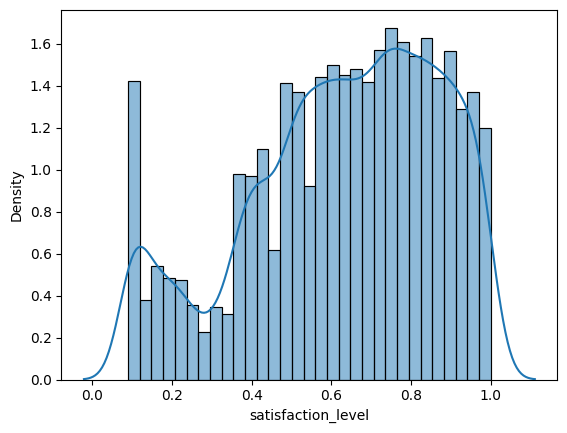

In [335]:
#Draw the distribution plot of satisfaction_level
sns.histplot(df["satisfaction_level"], kde=True, stat="density",kde_kws=dict(cut=3))

<Axes: xlabel='last_evaluation', ylabel='Density'>

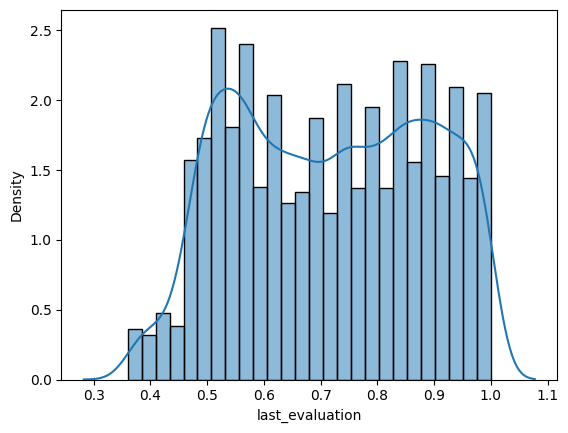

In [336]:
# Draw the distribution plot of last_evaluation
sns.histplot(df["last_evaluation"], kde=True, stat="density",kde_kws=dict(cut=3))

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

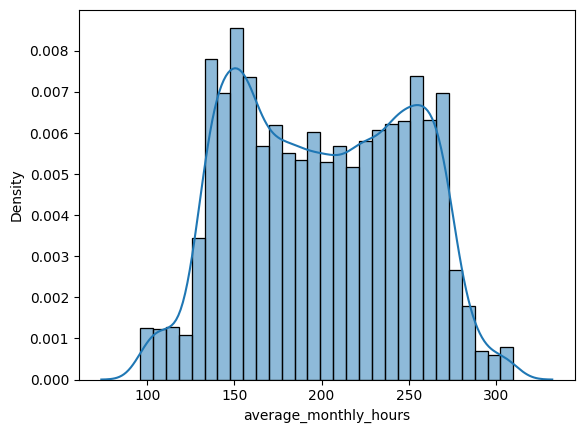

In [337]:
# Draw the distribution plot of average_monthly_hours
sns.histplot(df["average_monthly_hours"], kde=True, stat="density",kde_kws=dict(cut=3))

In [338]:
# distribution of employees left
df.left.value_counts(normalize=True)*100

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

Only 16.6% of total employees has left the organisation. We can see that these 2 classes are highly imbalanced.

Text(0.5, 1.0, 'On an Average no. of projects by employees left vs stayed')

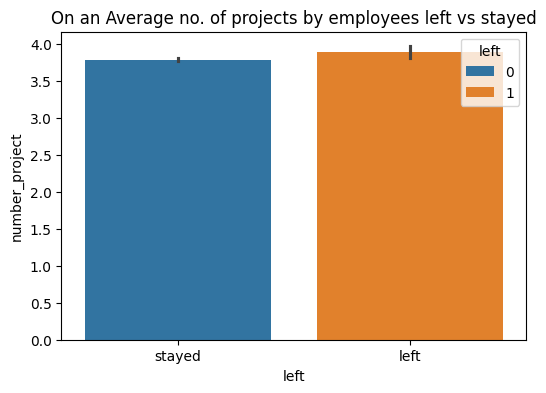

In [339]:
plt.figure(figsize=(6,4))
sns.barplot(df, y='number_project', x= 'left', hue='left')
plt.xticks([0,1],['stayed', 'left'])
plt.title('On an Average no. of projects by employees left vs stayed')

### Observations:
1. Almost equal no. of projects are worked upon, on an average by employess who had stayed and who had left the organisation. 

Text(0.5, 1.0, 'Number of projects by employees left vs stayed')

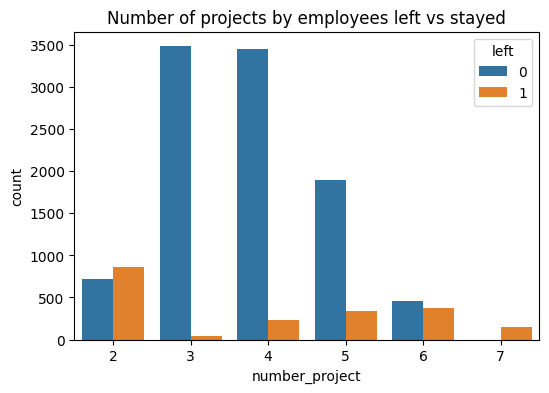

In [340]:
#Draw the bar plot of the employee project count of both employees who left and stayed in the organization
plt.figure(figsize=(6,4))
sns.countplot(df, x='number_project',hue='left')
plt.title('Number of projects by employees left vs stayed')

In [341]:
# Employee project count of both employees who left and stayed in the organization
df.groupby(['number_project', 'left'])['number_project'].count()

number_project  left
2               0        725
                1        857
3               0       3482
                1         38
4               0       3448
                1        237
5               0       1890
                1        343
6               0        455
                1        371
7               1        145
Name: number_project, dtype: int64

### Inference:
1. Employees who has assigned less noo of projects, 2 or less. These employees has high turnover around 54.17%. This might be due to employees feeling less important and under utilized. 
2. Employees assigned with 3-5 projects are seems to have low turn over where minimum turn over is with 3 projects.
3. Employees with high no.of projects, more than 6, also have high turn over with all of employees assigned 7 projects has left organisation.
4. 3-4 Number of projects might be the optimal. 

In [342]:
(857/(725+857))*100

54.171934260429836

## Clustering using Kmeans Algorithm:
Use columns satisfaction_level, last_evaluation, and left.

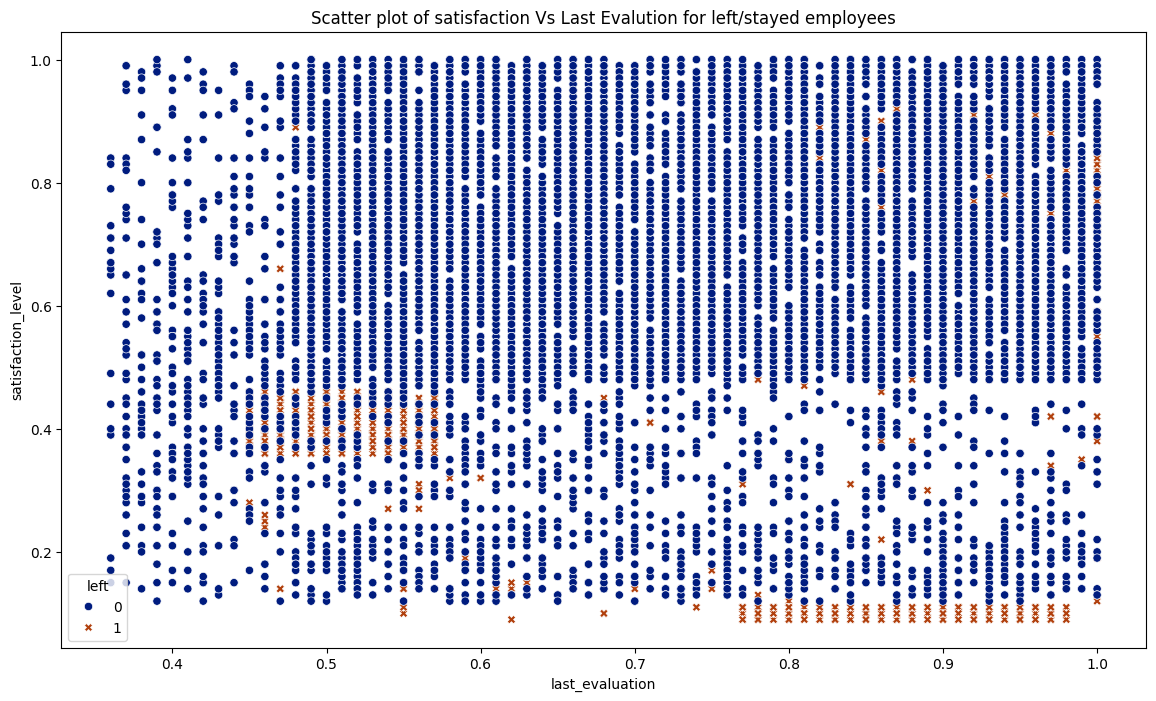

In [343]:
# Let's see the scatter plot for satisfaction level Vs Last Evaluation for left columns.
plt.figure(figsize=(14,8))
sns.scatterplot(df, x='last_evaluation', y='satisfaction_level',hue='left', style='left', palette='dark')
plt.title('Scatter plot of satisfaction Vs Last Evalution for left/stayed employees')
plt.show()

In [344]:
# Let's take 2 columns for our cluster analysis.
left_emp_df = df[df['left']== 1][["satisfaction_level", "last_evaluation"]]
left_emp_df.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


/var/folders/lq/jb6_wxbs2r36c6c1td3k35tr0000gq/T/ipykernel_146/3437133931.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(left_emp_df, x='last_evaluation', y='satisfaction_level', palette='dark')


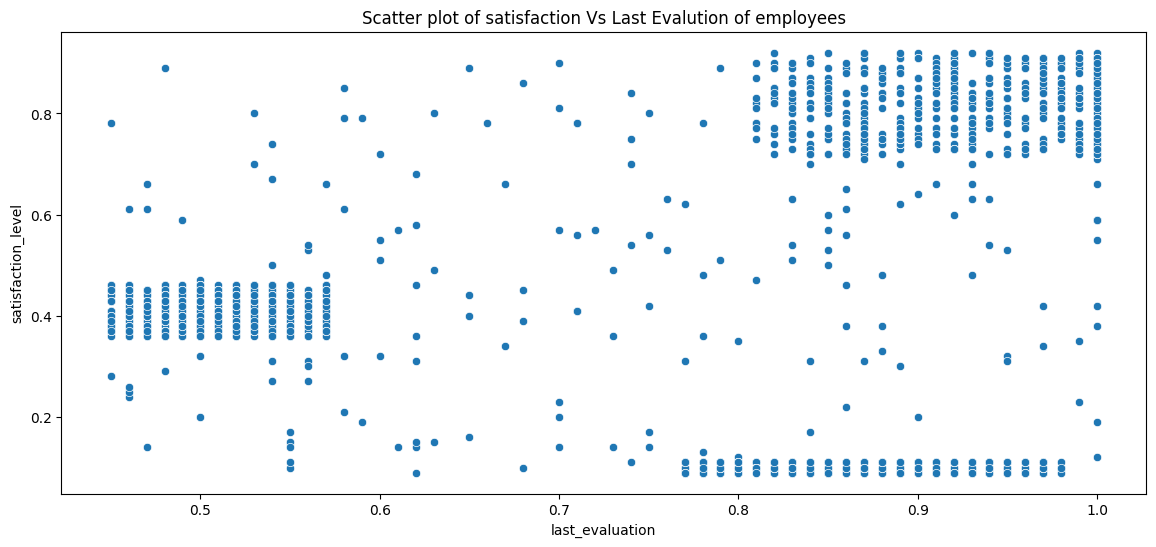

In [345]:
# Let's see the scatter plot for satisfaction level Vs Last Evaluation columns.
plt.figure(figsize=(14,6))
sns.scatterplot(left_emp_df, x='last_evaluation', y='satisfaction_level', palette='dark')
plt.title('Scatter plot of satisfaction Vs Last Evalution of employees')
plt.show()

In [346]:
# Import Kmeans clustering algorithm
from sklearn.cluster import KMeans

In [347]:
kmeans = KMeans(n_clusters=3) # kmeans algorithm instance with 3 Clusters
kmeans.fit(left_emp_df) # Fit on the data

KMeans(n_clusters=3)

In [348]:
kmeans.cluster_centers_

array([[0.1111985 , 0.86906367],
       [0.80587387, 0.91257658],
       [0.41013304, 0.51719512]])

In [349]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['satisfaction_level', 'last_evaluation'])

In [350]:
print(f"KMeans Inertia: {kmeans.inertia_}")
print(f"Kmeans clusters labels: {kmeans.labels_}")
print(f"Kmeans Centroid co-ordinates:\n {centers}")

KMeans Inertia: 15.16761915468746
Kmeans clusters labels: [2 1 0 ... 2 1 2]
Kmeans Centroid co-ordinates:
    satisfaction_level  last_evaluation
0            0.111199         0.869064
1            0.805874         0.912577
2            0.410133         0.517195


In [351]:
left_emp_df['cluster_label'] = kmeans.labels_
left_emp_df.head()

,satisfaction_level,last_evaluation,cluster_label
0,0.38,0.53,2
1,0.80,0.86,1
2,0.11,0.88,0
3,0.72,0.87,1
4,0.37,0.52,2


### Visualize the clusters

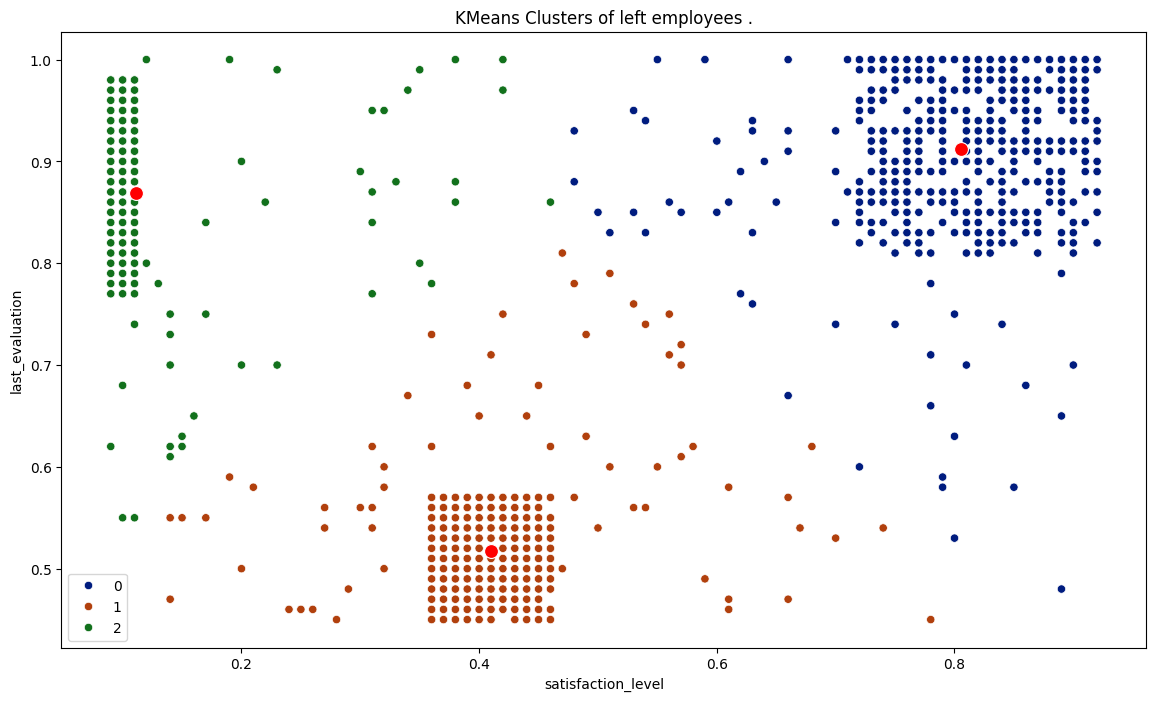

In [352]:
# The scatter plot to visulaize how is the data clustered by kmeans 
plt.figure(figsize=(14,8))
sns.scatterplot(left_emp_df_no_duplicate, x='satisfaction_level', y='last_evaluation',hue='cluster_label', palette='dark')
sns.scatterplot(x = centers['satisfaction_level'], y = centers['last_evaluation'] , color = 'r', s=100)
plt.title('KMeans Clusters of left employees .')
plt.show()

Red big dots represets the centers of the clusters indetified by KMeans

<Figure size 1400x800 with 0 Axes>

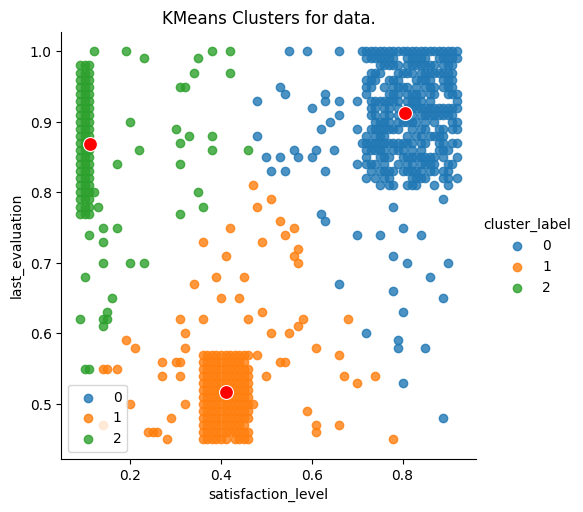

In [353]:
plt.figure(figsize=(14,8))
sns.lmplot(left_emp_df_no_duplicate, x='satisfaction_level', y='last_evaluation',hue='cluster_label', fit_reg=False)
sns.scatterplot(x = centers['satisfaction_level'], y = centers['last_evaluation'] , color = 'r', s=100)
plt.title('KMeans Clusters for data.')
plt.show()

### Inference:
1. High stisfaction (>0.5) and high last evaluation, denotted by blue color. Clustered in 0 group.
2. Employees who has moderate last evaluation and low to moderate satisfcation level represented by cluster 1 denooted by orange color.
3. All the employees with less satisfaction (0.5) and moderate to high last evaluation(denotted by Green color, label=2).


### Handle the left Class Imbalance using the SMOTE technique.

1. Pre-process the data by converting categorical columns to numerical columns

In [354]:
# Separating categorical variables and numeric variables
numerical_cols = df.select_dtypes(['int', 'float']).columns
object_types_cols= df.select_dtypes(['object']).columns

print(f"Numerical Columns:{numerical_cols}")
print(f"Categorical columns:{object_types_cols}")

Numerical Columns:Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')
Categorical columns:Index(['department', 'salary'], dtype='object')


In [355]:
df = pd.get_dummies(df, columns=object_types_cols, drop_first = True, dtype='int')

In [356]:
df[df.duplicated()].count()

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
time_spend_company        0
work_accident             0
left                      0
promotion_last_5years     0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
salary_low                0
salary_medium             0
dtype: int64

Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, auc, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

In [358]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,1,0,0,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [359]:
X,y = df.drop('left', axis=1), df.left

In [360]:
#Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [361]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9592, 18) (2399, 18) (9592,) (2399,)


Upsample the train dataset using the SMOTE technique from the imblearn module

In [362]:
y_train.value_counts(normalize=True)*100

left
0    83.39241
1    16.60759
Name: proportion, dtype: float64

In [363]:
# For class 1, has only 16.6 of total representation, we can upsample using a SMOTE technique
smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/Users/4336355/Downloads/IITG ML/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [364]:
# Now both representations are equal
y_train_smote.value_counts(normalize=True)*100

left
0    50.0
1    50.0
Name: proportion, dtype: float64

### Perform 5-fold cross-validation model training and evaluate performance.

1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report

In [365]:
# Train a logistic regression model, apply a 5-fold CV, and plot the classification report
# Let's do feature scaling as some of columns like average monthly hours, number_project are on different scale and might influnce the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [367]:
lr = LogisticRegression()
lr.fit(X_train_smote_scaled, y_train_smote)
y_pred_lr = lr.predict(X_test_scaled)

In [368]:
cv_score = cross_val_score(LogisticRegression(), X_train_smote_scaled, y_train_smote, cv=5)
print(f"Cross validation Score for LogisticRegression is:  {cv_score}")
print(f"Mean Cross validation Score for LogisticRegression is: {np.mean(cv_score)}")

Cross validation Score for LogisticRegression is:  [0.700625   0.8509375  0.8621875  0.84057518 0.84620194]
Mean Cross validation Score for LogisticRegression is: 0.8201054235698656


In [369]:
# Classifcation Report
cr_lm = classification_report(y_test, y_pred_lr)
print("Classification Report of Logistic Model : ")
print(cr_lm)

Classification Report of Logistic Model : 
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2001
           1       0.37      0.63      0.46       398

    accuracy                           0.76      2399
   macro avg       0.64      0.71      0.65      2399
weighted avg       0.82      0.76      0.78      2399



Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [370]:
# RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_smote_scaled, y_train_smote)
y_pred_rf = rf.predict(X_test_scaled)

In [371]:
cv_scor_rf = cross_val_score(RandomForestClassifier(), X_train_smote_scaled, y_train_smote, cv=5)
print(f"Cross validation Score for RandomForestClassifier is:  {cv_scor_rf}")
print(f"Mean Cross validation Score for RandomForestClassifier is: {np.mean(cv_scor_rf)}")

Cross validation Score for RandomForestClassifier is:  [0.9603125  0.9775     0.980625   0.98343232 0.97718037]
Mean Cross validation Score for RandomForestClassifier is: 0.9758100382932167


In [372]:
print("Classification Report of Random Forest Model : ")
print(classification_report(y_test, y_pred_rf))

Classification Report of Random Forest Model : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2001
           1       0.93      0.91      0.92       398

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

In [373]:
gb = GradientBoostingClassifier()
gb.fit(X_train_smote_scaled, y_train_smote)
y_pred_gb = gb.predict(X_test_scaled)

In [374]:
cv_score_db = cross_val_score(GradientBoostingClassifier(), X_train_smote_scaled, y_train_smote, cv=5)
print(f"Cross validation Score for GradientBoostingClassifier is:  {cv_score}")
print(f"Mean Cross validation Score for GradientBoostingClassifier is: {np.mean(cv_score)}")

Cross validation Score for GradientBoostingClassifier is:  [0.700625   0.8509375  0.8621875  0.84057518 0.84620194]
Mean Cross validation Score for GradientBoostingClassifier is: 0.8201054235698656


In [375]:
cr_gb = classification_report(y_test, y_pred_gb)
print("Classification Report of Gradient Boosting Model : ")
print(cr_gb)

Classification Report of Gradient Boosting Model : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.85      0.92      0.88       398

    accuracy                           0.96      2399
   macro avg       0.92      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399



### Identify the best model and justify the evaluation metrics used

Find the ROC/AUC for each model and plot the ROC curve.

In [376]:
all_pred_df = pd.DataFrame(
    {'Test': y_test, 'Logistic': y_pred_lr, 'RandomForest': y_pred_rf, 'GradientBoost': y_pred_gb})

In [377]:
all_models= ['Logistic', 'RandomForest', 'GradientBoost']

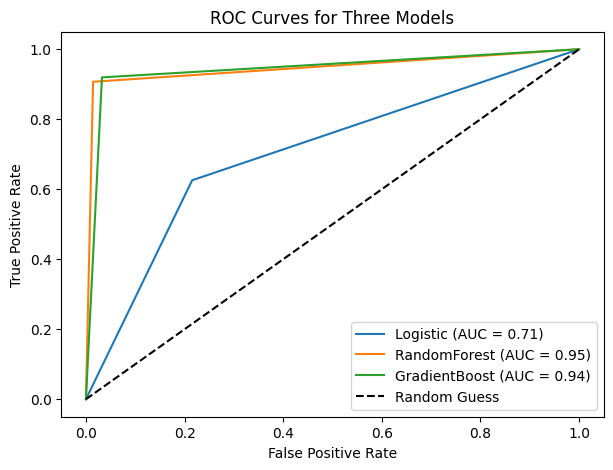

In [378]:
# Plotting ROC curve
plt.figure(figsize=(7, 5))

for model in all_models:
    fpr, tpr, _ = roc_curve(all_pred_df['Test'], all_pred_df[model])
    auc = roc_auc_score(all_pred_df['Test'], all_pred_df[model])
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Three Models')
plt.legend()
plt.show()

**AUC (Area Under the Curve):** This is a single scalar value that summarizes the overall performance of the model. A higher AUC indicates better discriminatory power. An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 represents a classifier that performs no better than random guessing (represented by the dashed diagonal line).

**Gradient Boosting (AUC = 0.95):** This model has the highest AUC, very close to 1.0. Its curve is the furthest away from the random guess line, especially in the lower to middle range of the False Positive Rate. This indicates that for any given False Positive Rate, the Gradient Boosting model achieves a higher True Positive Rate (Recall) compared to the other models.

**Random Forest (AUC = 0.94):** The Random Forest model also shows excellent performance, with an AUC very close to that of the Gradient Boosting model. Its curve is also significantly above the random guess line across most of the False Positive Rate range.

**Logistic (AUC = 0.71):** The Logistic Regression model has a considerably lower AUC compared to the other two. Its curve is closer to the random guess line, indicating a weaker ability to discriminate between employees who will stay and those who will leave. At lower False Positive Rates, its True Positive Rate is also lower than the other two models.

Find the confusion matrix for each of the models.

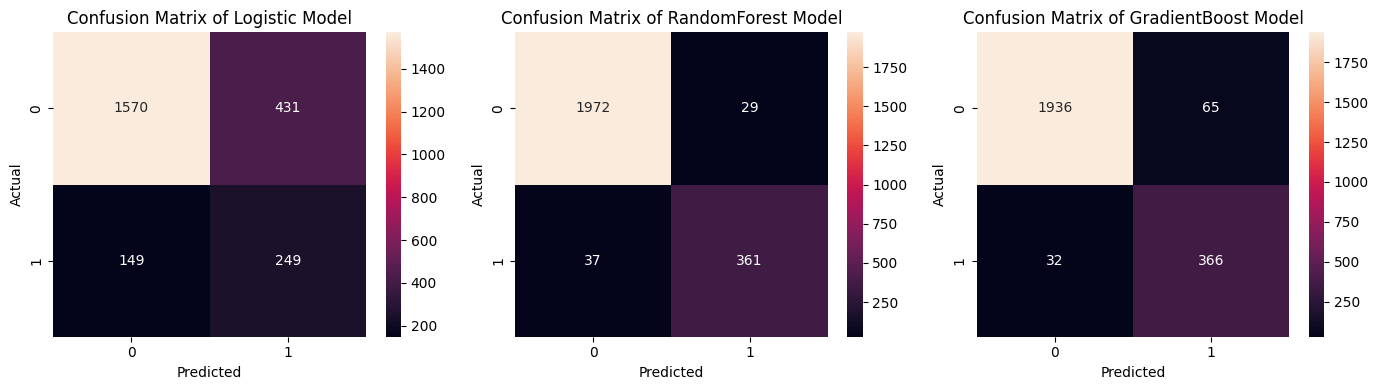

In [379]:
# Plot confusion matrix of all models and comapre
fig, axes = plt.subplots(1, len(all_models), figsize=(14, 4)) 

for i, model in enumerate(all_models):
    cm = confusion_matrix(all_pred_df['Test'], all_pred_df[model])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix of {model} Model')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout() 
plt.show()

Explain which metric needs to be used from the confusion matrix: Recall or Precision?

Given the high Recall and Precision scores of the Random Forest and Gradient Boosting models for the 'Left' class, these models are significantly better for employee turnover prediction than the Logistic Regression model. For the better-performing models, the decision to slightly prioritize Recall or Precision would depend on a more understanding of the specific costs associated with False Negatives and False Positives in your organization. If losing a key employee unexpectedly has a very high cost, even a slight edge in Recall might be preferred. Conversely, if unnecessary interventions are very expensive or detrimental to morale, a slight edge in Precision might be favored.

### Suggest various retention strategies for targeted employees

Using the best model, predict the probability of employee turnover in the test data.

In [380]:
# As per above evaluation, RandomForestClassifier seems to be best model for this prediction.
y_test_prob = rf.predict_proba(X_test_scaled)[:, 1]

df_test = X_test.copy()
df_test['left_prob'] = y_test_prob
df_test

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_prob
8578,0.82,0.95,6,191,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0.15
5756,0.18,0.86,5,267,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0.41
3994,0.63,0.98,4,160,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0.00
1784,0.43,0.51,2,149,3,1,0,0,1,0,0,0,0,0,0,0,0,1,0.90
10508,0.51,0.98,4,245,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0.61,0.95,5,233,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0.01
5207,0.94,0.59,3,137,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0.00
10865,0.96,0.68,3,132,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0.00
5054,0.75,0.90,4,197,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0.00


In [381]:
def retention_strategy(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

df_test['retention_zone'] = df_test['left_prob'].apply(retention_strategy)

In [382]:
# Count occurrences of each retention zone
zone_counts = df_test['retention_zone'].value_counts()
zone_counts

retention_zone
Safe Zone (Green)            1830
High-Risk Zone (Red)          328
Low-Risk Zone (Yellow)        194
Medium-Risk Zone (Orange)      47
Name: count, dtype: int64

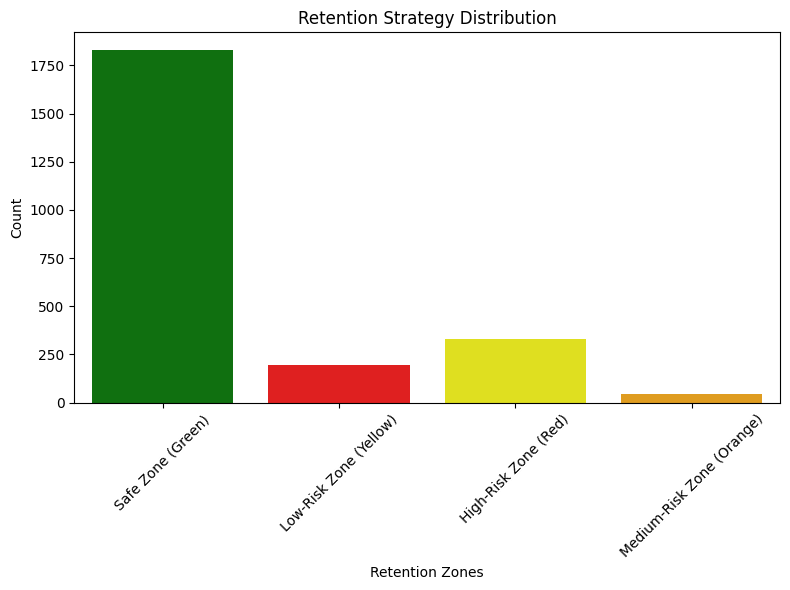

In [383]:
plt.figure(figsize=(8, 6))
sns.countplot(df_test, x='retention_zone', palette=['green', 'red', 'yellow', 'orange'], hue='retention_zone')
plt.title('Retention Strategy Distribution')
plt.xlabel('Retention Zones')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Implement the following retention actions based on zone:

**Safe Zone:** Sustain existing policies.

**Low-Risk Zone:** Offer minor incentives; provide recognition.

**Medium-Risk Zone:** Focus on career development and boost engagement.

**High-Risk Zone:** Conduct individual discussions, offer significant incentives, and resolve grievances.